# Detailed Comparison of Machine learning and Processing Techniques for Disease Detection

Cardiovascular diseases are the leading cause of death globally, resulted in 17.9 million deaths (32.1%) in 2015, up from 12.3 million (25.8%) in 1990. It is estimated that 90% of CVD is preventable. There are many risk factors for heart diseases that we will take a closer look at.

The main objective of this study is to build a model that can predict the heart disease occurrence, based on a combination of features (risk factors) describing the disease. Different machine learning classification techniques will be implemented and compared upon standard performance metric such as accuracy.

The dataset used for this study was taken from UCI machine learning repository, titled “Heart Disease Data Set”.

Contents of the Notebook:

Dataset structure & description
Analyze, identify patterns, and explore the data
Data preparation
Modelling and predicting with Machine Learning
Conclusion


In [2]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib
from sklearn.metrics import accuracy_score,roc_auc_score
import scikitplot as skplt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# 1. Dataset structure & description
The dataset used in this project contains 14 variables. The independent variable that needs to be predicted, 'diagnosis', determines whether a person is healthy or suffer from heart disease. Experiments with the Cleveland database have concentrated on endeavours to distinguish disease presence (values 1, 2, 3, 4) from absence (value 0). There are several missing attribute values, distinguished with symbol '?'. The header row is missing in this dataset, so the column names have to be inserted manually.

Features information:
age - age in years
sex - sex(1 = male; 0 = female)
chest_pain - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
blood_pressure - resting blood pressure (in mm Hg on admission to the hospital)
serum_cholestoral - serum cholestoral in mg/dl
fasting_blood_sugar - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
electrocardiographic - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
max_heart_rate - maximum heart rate achieved
induced_angina - exercise induced angina (1 = yes; 0 = no)
ST_depression - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
no_of_vessels - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
diagnosis - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)
Types of features:
Categorical features (Has two or more categories and each value in that feature can be categorised by them): sex, chest_pain

Ordinal features (Variable having relative ordering or sorting between the values): fasting_blood_sugar, electrocardiographic, induced_angina, slope, no_of_vessels, thal, diagnosis

Continuous features (Variable taking values between any two points or between the minimum or maximum values in the feature column): age, blood_pressure, serum_cholestoral, max_heart_rate, ST_depression



In [3]:
# column names in accordance with feature information
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv("heart_disease_all15.csv", names=col_names, header=None, na_values="?")

print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
# Considering only female gender for analysis
df = df[~df['sex'].isin(['0',0])]
df.head()

Number of records: 920
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
5,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 919
Data columns (total 14 columns):
age                     726 non-null int64
sex                     726 non-null int64
chest_pain              726 non-null int64
blood_pressure          669 non-null float64
serum_cholestoral       719 non-null float64
fasting_blood_sugar     651 non-null float64
electrocardiographic    725 non-null float64
max_heart_rate          673 non-null float64
induced_angina          673 non-null float64
ST_depression           665 non-null float64
slope                   613 non-null float64
no_of_vessels           422 non-null float64
thal                    515 non-null float64
diagnosis               726 non-null int64
dtypes: float64(10), int64(4)
memory usage: 85.1 KB


In [5]:
# extract numeric columns and find categorical ones
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)


['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


# 2.Analyze features, identify patterns, and explore the data¶
Target value
Knowing the distribution of target value is vital for choosing appropriate accuracy metrics and consequently properly assess different machine learning models.

Since the values 1-4 indicate that a disease is present, it's reasonable to pull them together.

In [6]:
# count values of explained variable

df.diagnosis.value_counts()


0    267
1    173
3    124
2    124
4     38
Name: diagnosis, dtype: int64

In [7]:
 
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

1    459
0    267
Name: diagnosis, dtype: int64

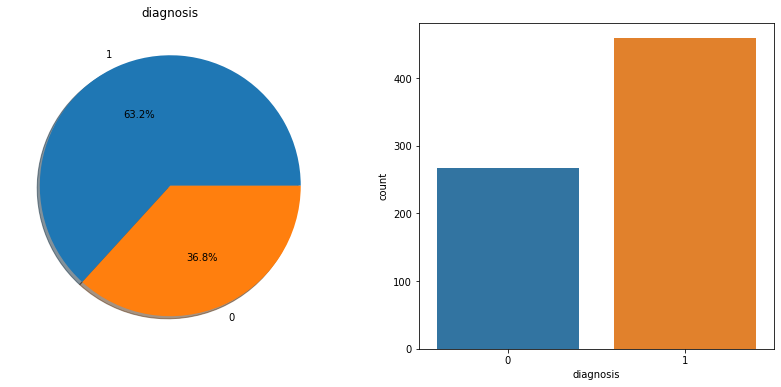

In [8]:
# create two plots side by side
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

# Numeric features
There are 5 numeric columns, so let's take care of them first. Outliers occurrence in the dataset may be a result of wrong input and create undesired noise, thus our role is to evaluate their substance. A data point is considered as an outlier when it falls outside 3 standard deviations.

In [9]:
# view of descriptive statistics
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,719.000000,673.000000,726.000000,669.000000,665.000000
mean,183.484006,135.063893,53.787879,132.143498,0.939850
std,116.272394,26.390166,9.392685,18.951807,1.120425
min,-9.000000,60.000000,28.000000,0.000000,-2.600000
25%,108.500000,117.000000,47.000000,120.000000,0.000000
50%,219.000000,135.000000,55.000000,130.000000,0.600000
75%,261.000000,154.000000,60.000000,140.000000,1.800000
max,603.000000,202.000000,77.000000,200.000000,5.600000


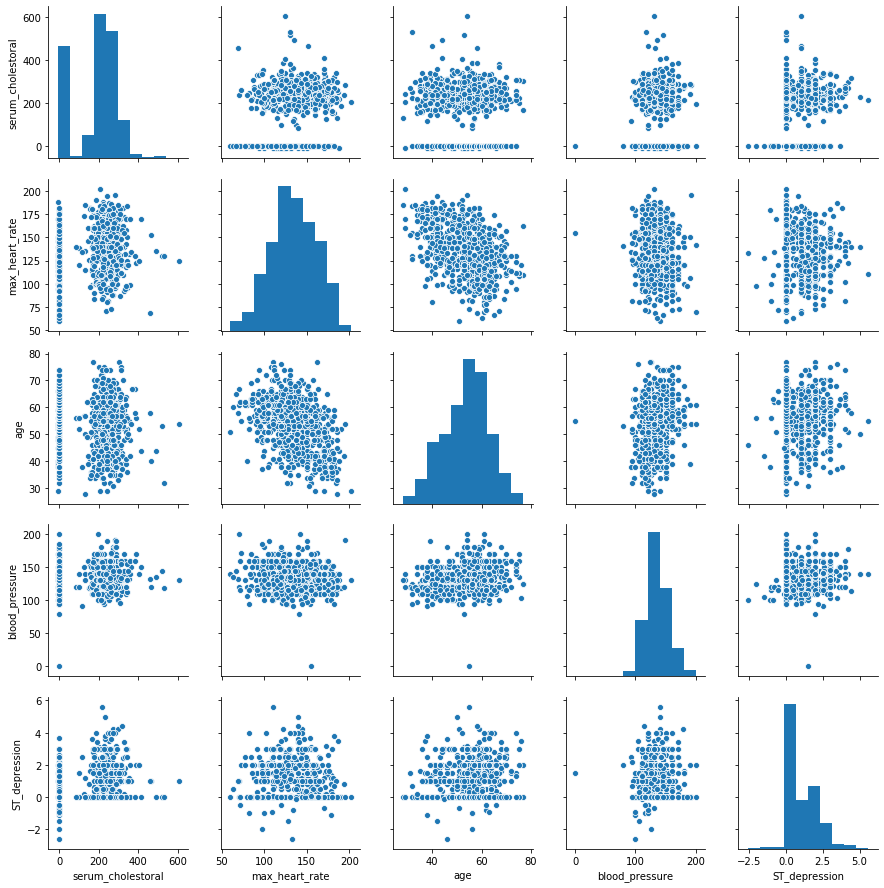

In [10]:
# create a pairplot
sns.pairplot(df[numeric_columns])
plt.show()

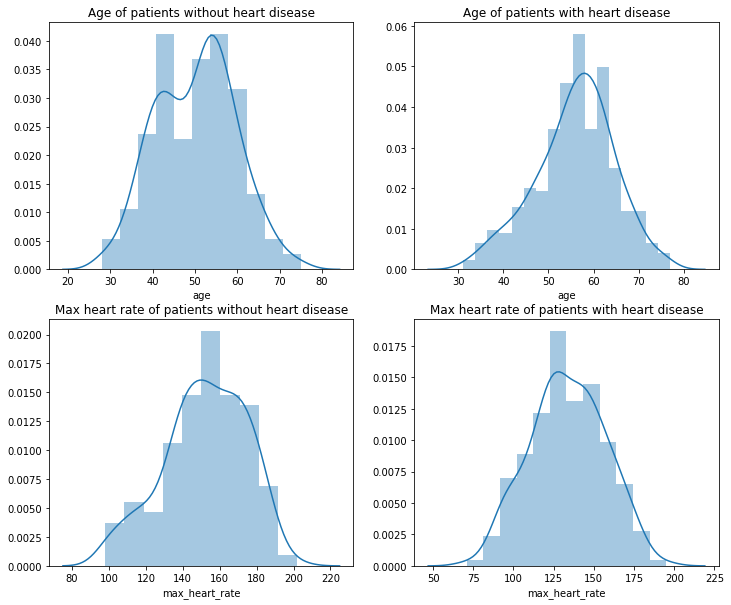

In [11]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].dropna().dropna().max_heart_rate)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].dropna().max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

# Categorical features
Let's take a closer look at categorical variables and see how they impact our target.

In [12]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
1    0            267
     1            459
Name: diagnosis, dtype: int64

In [13]:
# average number of diagnosed people grouped by number of blood vessels detected by fluoroscopy
df[['no_of_vessels','diagnosis']].dropna().where(df['no_of_vessels']>= 0).groupby('no_of_vessels').count().apply(lambda x:
                                                 100 * x / float(x.sum()))

,diagnosis
no_of_vessels,
0.0,54.716981
1.0,24.528302
2.0,13.207547
3.0,7.547170


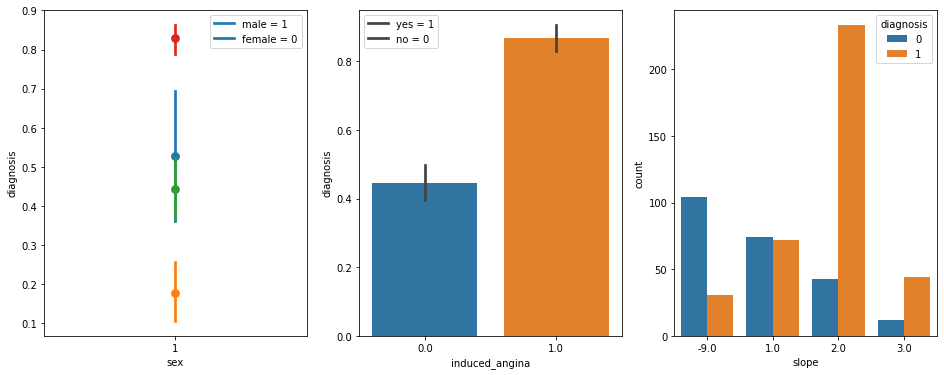

In [14]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="diagnosis", hue='chest_pain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='diagnosis', data=df)
plt.show()

# Observations:
Men are much more prone to get a heart disease than women.
The higher number of vessels detected through fluoroscopy, the higher risk of disease.
While soft chest pain may be a bad symptom of approaching problems with heart (especially in case of men), strong pain is a serious warning!
Risk of getting heart disease might be even 3x higher for someone who experienced exercise-induced angina.
The flat slope (value=2) and downslope (value=3) of the peak exercise indicates a high risk of getting diseas

# 3.Data Preparation
In order to make our dataset compatible with machine learning algorithms contained in Sci-kit Learn library, first of all, we need to handle all missing data.

There are many options we could consider when replacing a missing value, for example:

A constant value that has meaning within the domain, such as 0, distinct from all other values
A value from another randomly selected record
A mean, median or mode value for the column
A value estimated by another predictive model

In [15]:

# fill missing values with mode
df.dropna(how='any', inplace=True) 


In [16]:
df.shape
df = df[df.no_of_vessels != -9.0]



In [21]:
# split the data
X, y = df.iloc[:, :-1].fillna(X_test.mean()), df.iloc[:, -1]
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=2606)

Data needs to be normalized or standardized before applying to machine learning algorithms. Standardization scales the data and gives information on how many standard deviations the data is placed from its mean value. Effectively, the mean of the data (µ) is 0 and the standard deviation (σ) is 1.

In [22]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [23]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
def train_model_info(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred=model.predict(X_test)
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
    
    confusion=confusion_matrix(y_test, y_pred)
    confusion=np.asarray(confusion)
    print(confusion/confusion.sum())
    cmat=confusion/confusion.sum()
    print(model)
    
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cmat, annot=True)
    plt.title('Model \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return model
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred=model.predict(X_test)
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# K-Nearest Neighbours (KNN)
K-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. The principle behind nearest neighbour methods is to find a predefined number of training samples closest in distance to the new point and predict the label from these.

Train accuracy: 87.41%
Test accuracy: 80.65%
ROC AUC score 0.810479375696767
[[0.30645161 0.06451613]
 [0.12903226 0.5       ]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


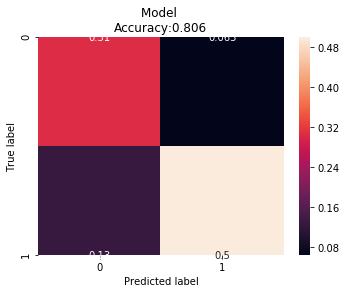

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 72.58%
n_neigbors = 2
Train accuracy: 83.22%
Test accuracy: 67.74%
n_neigbors = 3
Train accuracy: 86.01%
Test accuracy: 79.03%
n_neigbors = 4
Train accuracy: 84.62%
Test accuracy: 75.81%
n_neigbors = 5
Train accuracy: 87.41%
Test accuracy: 80.65%
n_neigbors = 6
Train accuracy: 79.72%
Test accuracy: 75.81%
n_neigbors = 7
Train accuracy: 81.82%
Test accuracy: 75.81%
n_neigbors = 8
Train accuracy: 81.82%
Test accuracy: 77.42%
n_neigbors = 9
Train accuracy: 82.52%
Test accuracy: 80.65%


In [24]:
# KNN

model = train_model_info(X_train, y_train, X_test, y_test, KNeighborsClassifier)
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

# kNN with grid search
Improving the accuracy scores with grid search

In [25]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)

param_grid = dict(n_neighbors=k_range)
#print(param_grid)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,iid=False)
c=grid.fit(X_train,y_train)
print(c)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time', 'params']]

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.753700,0.101970,0.001138,{'n_neighbors': 1}
1,0.735201,0.083524,0.000738,{'n_neighbors': 2}
2,0.773700,0.076010,0.000713,{'n_neighbors': 3}
3,0.733150,0.098590,0.000674,{'n_neighbors': 4}
4,0.752674,0.102760,0.000677,{'n_neighbors': 5}
5,0.739341,0.095498,0.000999,{'n_neighbors': 6}
6,0.759744,0.093100,0.000718,{'n_neighbors': 7}
7,0.762894,0.092646,0.000688,{'n_neighbors': 8}
8,0.748059,0.094921,0.000653,{'n_neighbors': 9}
9,0.763919,0.089653,0.000688,{'n_neighbors': 10}


Accuracy score 0.7580645161290323
ROC AUC score 0.7452619843924191
[[0.25806452 0.11290323]
 [0.12903226 0.5       ]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


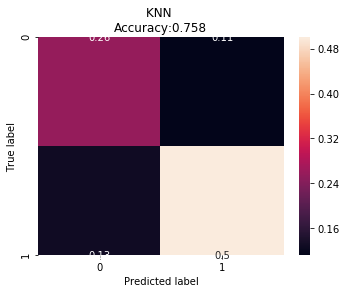

In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))




confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Decision Trees
DT algorithm creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. It is simple to understand and interpret and it's possible to visualize how important a particular feature was for our tree.

Train accuracy: 100.00%
Test accuracy: 72.58%
ROC AUC score 0.7107023411371237
[[0.24193548 0.12903226]
 [0.14516129 0.48387097]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


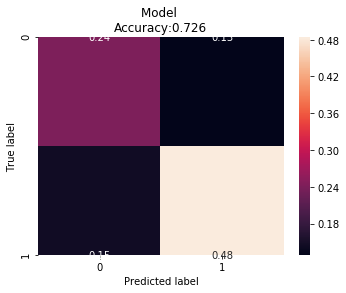

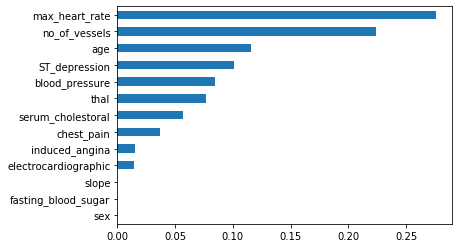

In [27]:
# Decision Tree
model = train_model_info(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=None)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

Variable 'thal' turns out to be a significantly important feature.
Remember my hypothesis that 'fasting_blood_sugar" is a very weak feature? Above graph confirms this clearly.
Decision tree model learns the train set perfectly, and at the same time is entirely overfitting the data, what results in poor prediction. Other values of 'max_depth' parameter need to be tried out.

In [28]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=None)

max_depth = 1
Train accuracy: 72.73%
Test accuracy: 80.65%
max_depth = 2
Train accuracy: 78.32%
Test accuracy: 69.35%
max_depth = 3
Train accuracy: 83.92%
Test accuracy: 79.03%
max_depth = 4
Train accuracy: 88.81%
Test accuracy: 79.03%
max_depth = 5
Train accuracy: 93.01%
Test accuracy: 70.97%
max_depth = 6
Train accuracy: 97.20%
Test accuracy: 72.58%
max_depth = 7
Train accuracy: 98.60%
Test accuracy: 70.97%


In [29]:
param_grid = { 'criterion':['gini','entropy'],'min_samples_split' : range(10,500,20),'max_depth': np.arange(1, 15)}
# decision tree model
clf=DecisionTreeClassifier()
    #use gridsearch to test all values
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')
    #fit model to data
c=grid.fit(X_train,y_train)
print(c.best_estimator_)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time', 'params']]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


,mean_test_score,std_test_score,mean_fit_time,params
0,0.622378,0.050746,0.001009,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
1,0.622378,0.050746,0.000871,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
2,0.622378,0.050746,0.000787,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
3,0.622378,0.050746,0.000592,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
4,0.622378,0.050746,0.000590,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."
...,...,...,...,...
695,0.524476,0.009017,0.000465,"{'criterion': 'entropy', 'max_depth': 14, 'min..."
696,0.524476,0.009017,0.000443,"{'criterion': 'entropy', 'max_depth': 14, 'min..."
697,0.524476,0.009017,0.000443,"{'criterion': 'entropy', 'max_depth': 14, 'min..."
698,0.524476,0.009017,0.000449,"{'criterion': 'entropy', 'max_depth': 14, 'min..."


### Decision Trees with gridcv

Accuracy score 0.7903225806451613
ROC AUC score 0.7798216276477146
[[0.27419355 0.09677419]
 [0.11290323 0.51612903]]


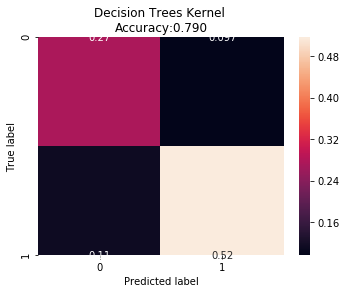

In [30]:
clf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2606, splitter='best')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))

#print(clf.best_estimator_)



confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()


plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('Decision Trees Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Logistic Regression
Logistic regression is a basic technique in statistical analysis that attempts to predict a data value based on prior observations. A logistic regression algorithm looks at the relationship between a dependent variable and one or more dependent variables.

Train accuracy: 85.31%
Test accuracy: 77.42%
ROC AUC score 0.7491638795986623
[[0.24193548 0.12903226]
 [0.09677419 0.53225806]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


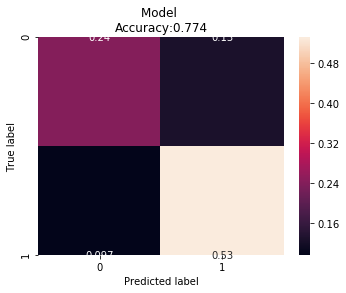

In [31]:
# Logistic Regression
model = train_model_info(X_train, y_train, X_test, y_test, LogisticRegression)

# logistic regression grid search cv

In [32]:
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C=[0.001,.009,0.1,.09,0.12,5,10,25,0.2,0.15]
solver= solver= [ 'lbfgs', 'liblinear', 'sag', 'saga']
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty,solver=solver)
grid = GridSearchCV(LogisticRegression(max_iter=1000), hyperparameters,scoring='accuracy')

# fitting the model for grid search 
grid.fit(X_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'mean_fit_time','params']]

{'C': 0.009, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.009, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.657343,0.016449,0.003397,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,0.797203,0.007912,0.001008,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli..."
2,0.657343,0.016449,0.001420,"{'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}"
3,0.657343,0.016449,0.001489,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}"
4,0.776224,0.041183,0.003906,"{'C': 0.009, 'penalty': 'l2', 'solver': 'lbfgs'}"
5,0.804196,0.009053,0.001769,"{'C': 0.009, 'penalty': 'l2', 'solver': 'libli..."
6,0.776224,0.041183,0.001351,"{'C': 0.009, 'penalty': 'l2', 'solver': 'sag'}"
7,0.776224,0.041183,0.001304,"{'C': 0.009, 'penalty': 'l2', 'solver': 'saga'}"
8,0.797203,0.037687,0.002584,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}"
9,0.804196,0.033886,0.000776,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."


Accuracy score 0.7741935483870968
ROC AUC score 0.7491638795986623
[[0.24193548 0.12903226]
 [0.09677419 0.53225806]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


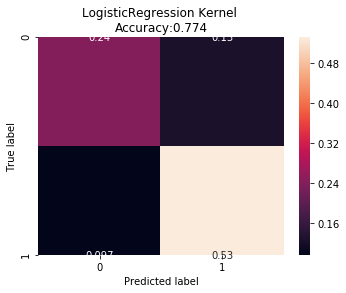

In [33]:
clf=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))




confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('LogisticRegression Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

## Gaussian Naive Bayes
In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Train accuracy: 79.02%
Test accuracy: 79.03%
ROC AUC score 0.761984392419175
[[0.24193548 0.12903226]
 [0.08064516 0.5483871 ]]
GaussianNB(priors=None, var_smoothing=1e-09)


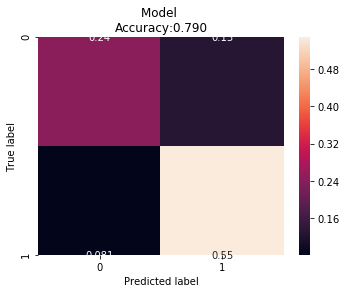

In [34]:
#Gaussian Naive Bayes
model = train_model_info(X_train, y_train, X_test, y_test, GaussianNB)

# Support Vector Machines
Support Vector Machines are perhaps one of the most popular machine learning algorithms. They are the go-to method for a high-performing algorithm with a little tuning. At first, let's try it on default settings.

Train accuracy: 89.51%
Test accuracy: 80.65%
ROC AUC score 0.7748049052396879
[[0.24193548 0.12903226]
 [0.06451613 0.56451613]]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


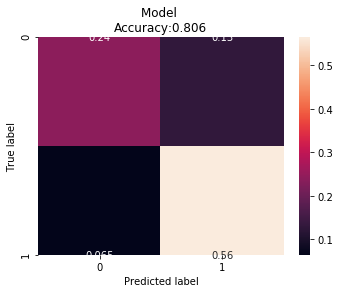

In [35]:
# Support Vector Machines
model = train_model_info(X_train, y_train, X_test, y_test, SVC)

# SVM with gridsearch

In [36]:
k_range = list(range(1, 31))


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 0.05],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time' ,'params']]

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.521, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.521, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.812, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.833, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.830, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.812, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.812, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.750, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.812, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.830, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


,mean_test_score,std_test_score,mean_fit_time,params
0,0.524476,0.005205,0.001291,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}"
1,0.811189,0.018809,0.001093,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}"
2,0.685315,0.017353,0.001472,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.811189,0.018809,0.001148,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}"
4,0.524476,0.005205,0.001379,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}"
5,0.811189,0.018809,0.002061,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}"
6,0.524476,0.005205,0.001415,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}"
7,0.811189,0.018809,0.001909,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}"
8,0.524476,0.005205,0.001690,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}"
9,0.811189,0.018809,0.001164,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}"


In [37]:
print(grid.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy score 0.7741935483870968
ROC AUC score 0.758082497212932
[[0.25806452 0.11290323]
 [0.11290323 0.51612903]]
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


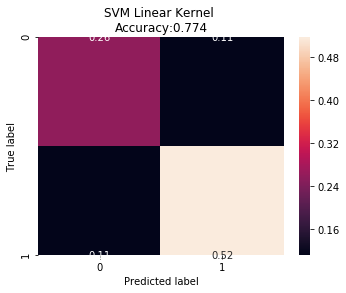

In [38]:
from sklearn.svm import SVC

clf=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))




confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forests
Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Train accuracy: 98.60%
Test accuracy: 79.03%
ROC AUC score 0.7798216276477146
[[0.27419355 0.09677419]
 [0.11290323 0.51612903]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2606,
                       verbose=0, warm_start=False)


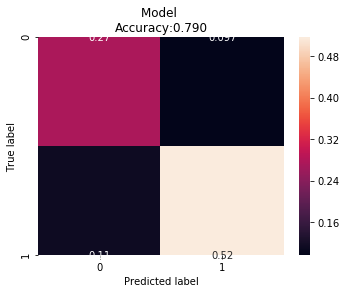

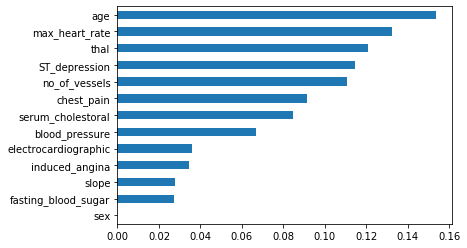

In [39]:
# Random Forests
model = train_model_info(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()


# Random Forest with grid

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [60,100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)


# fitting the model for grid search 
grid.fit(X_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score','mean_fit_time', 'params']]

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 60}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.797203,0.035036,0.063185,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
1,0.762238,0.039900,0.087654,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
2,0.769231,0.057380,0.174731,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
3,0.769231,0.057380,0.438269,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
4,0.797203,0.035036,0.053906,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
...,...,...,...,...
115,0.797203,0.042479,0.527041,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
116,0.832168,0.081448,0.064627,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
117,0.804196,0.081654,0.102851,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
118,0.783217,0.060437,0.211978,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."


Accuracy score 0.7580645161290323
ROC AUC score 0.7274247491638797
[[0.22580645 0.14516129]
 [0.09677419 0.53225806]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


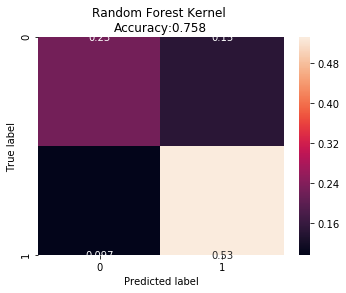

In [41]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))


confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('Random Forest Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#pd.DataFrame(da

# Gradient Boosting

Train accuracy: 100.00%
Test accuracy: 79.03%
ROC AUC score 0.7798216276477146
[[0.27419355 0.09677419]
 [0.11290323 0.51612903]]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=2606, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


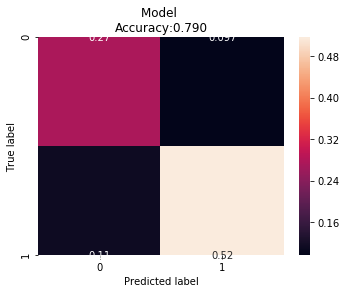

In [42]:
# Gradient Boosting
model = train_model_info(X_train, y_train, X_test, y_test, GradientBoostingClassifier, random_state=2606)

## Gradient Boosting Classifier grid search

In [43]:
param_test2 = {'n_estimators':[40,50,60],'max_depth':range(3,16,1),'learning_rate':[0.2], 'min_samples_split':range(2,500,50),'criterion':['friedman_mse']}

estimator=GradientBoostingClassifier( max_leaf_nodes=None,  min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,  min_weight_fraction_leaf=0.0,    n_iter_no_change=None, presort='auto',  random_state=None, subsample=1.0, tol=0.0001, warm_start=False, 
                           validation_fraction=0.1, verbose=0)

grid = GridSearchCV(estimator =estimator,param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
grid.fit(X_train,y_train)
# fitting the model for grid search 
grid.fit(X_train, y_train) 

  


print(grid.best_params_) 

print(grid.best_estimator_)
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'mean_fit_time','params']]

{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 52, 'n_estimators': 40}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=52,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,mean_test_score,std_test_score,mean_fit_time,params
0,0.775616,0.055155,0.038799,"{'criterion': 'friedman_mse', 'learning_rate':..."
1,0.754433,0.076860,0.050019,"{'criterion': 'friedman_mse', 'learning_rate':..."
2,0.782512,0.062842,0.044585,"{'criterion': 'friedman_mse', 'learning_rate':..."
3,0.789901,0.050125,0.025499,"{'criterion': 'friedman_mse', 'learning_rate':..."
4,0.762069,0.056071,0.026070,"{'criterion': 'friedman_mse', 'learning_rate':..."
...,...,...,...,...
385,0.524631,0.009050,0.014350,"{'criterion': 'friedman_mse', 'learning_rate':..."
386,0.524631,0.009050,0.016267,"{'criterion': 'friedman_mse', 'learning_rate':..."
387,0.524631,0.009050,0.011022,"{'criterion': 'friedman_mse', 'learning_rate':..."
388,0.524631,0.009050,0.013657,"{'criterion': 'friedman_mse', 'learning_rate':..."


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=52,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy score 0.7903225806451613
ROC AUC score 0.7709030100334449
[[0.25806452 0.11290323]
 [0.09677419 0.53225806]]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=Non

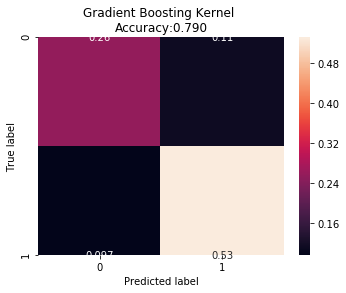

In [44]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=11,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=52,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(clf)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))



confusion=confusion_matrix(y_test, y_pred)
confusion=np.asarray(confusion)
print(confusion/confusion.sum())
cmat=confusion/confusion.sum()

print(clf)

plt.figure(figsize=(5.5,4))
sns.heatmap(cmat, annot=True)
plt.title('Gradient Boosting Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

In [45]:
# initialize an empty list
accuracy = []
roc=[]
mean_squared_errors=[]
precision_scores=[]

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests','Gradient Boosting']

# list of algorithms with parameters
models = [KNeighborsClassifier(),DecisionTreeClassifier(), LogisticRegression(), GaussianNB(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()]

# loop through algorithms and append the score into the list
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred=clf.predict(X_test)
    accuracy.append(score)
    roc.append(roc_auc_score(y_test,y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    mean_squared_errors.append(mean_squared_error(y_test, y_pred))
# create a dataframe from accuracy results
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.806452
Decision Trees,0.725806
Logistic Regression,0.774194
Naive Bayes,0.790323
SVM,0.806452
Random Forests,0.758065
Gradient Boosting,0.790323


## 5. Conclusion
The goal of the project was to compare different machine learning algorithms and predict if a certain person, given various personal characteristics and symptoms, will get heart disease or not. Here are the final results

In [46]:
# initialize an empty list
accuracy = []
roc=[]
mean_squared_errors=[]

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests','Gradient Boosting']

# list of algorithms with parameters
models = [KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=7, p=2,
                                            weights='uniform'), DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'), LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 
        GaussianNB(), SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False),GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=2606, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)]

# loop through algorithms and append the score into the list
from sklearn.metrics import precision_score
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred=clf.predict(X_test)
    accuracy.append(score)
    roc.append(roc_auc_score(y_test,y_pred))
    mean_squared_errors.append(precision_score(y_test, y_pred))
    

In [47]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary


,accuracy
KNN,0.758065
Decision Trees,0.725806
Logistic Regression,0.774194
Naive Bayes,0.790323
SVM,0.774194
Random Forests,0.758065
Gradient Boosting,0.790323


In [48]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=10)
kf.get_n_splits(X)
clf = GaussianNB()
print(cross_val_score(clf, X, y, cv=kf, n_jobs=1))
print(cross_val_score(clf, X, y, cv=kf, n_jobs=1).mean())

[0.80952381 0.71428571 0.80952381 0.9047619  0.61904762 0.85
 0.7        0.95       0.7        0.85      ]
0.7907142857142857


In [49]:
from sklearn.neural_network import MLPClassifier
for i in range(6,20):
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    clf=mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=(i))
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #print(cross_val_score(clf, X, y, cv=kf, n_jobs=1))
    #print(cross_val_score(clf, X, y, cv=kf, n_jobs=1).mean())
    #print(clf)
    print("Accuracy score {"+str(i)+"}:"+str(accuracy_score(y_test,y_pred)))
    print("ROC AUC score {"+str(i)+"}:"+str(roc_auc_score(y_test,y_pred)))

Accuracy score {6}:0.7580645161290323
ROC AUC score {6}:0.7452619843924191
Accuracy score {7}:0.7419354838709677
ROC AUC score {7}:0.7591973244147157
Accuracy score {8}:0.7580645161290323
ROC AUC score {8}:0.7274247491638797
Accuracy score {9}:0.7258064516129032
ROC AUC score {9}:0.6750278706800446
Accuracy score {10}:0.6935483870967742
ROC AUC score {10}:0.6583054626532887
Accuracy score {11}:0.6290322580645161
ROC AUC score {11}:0.6337792642140468
Accuracy score {12}:0.7741935483870968
ROC AUC score {12}:0.7224080267558528
Accuracy score {13}:0.7580645161290323
ROC AUC score {13}:0.7452619843924191
Accuracy score {14}:0.8225806451612904
ROC AUC score {14}:0.7876254180602007
Accuracy score {15}:0.7580645161290323
ROC AUC score {15}:0.7006688963210703
Accuracy score {16}:0.7903225806451613
ROC AUC score {16}:0.7530657748049052
Accuracy score {17}:0.8064516129032258
ROC AUC score {17}:0.7837235228539576
Accuracy score {18}:0.7741935483870968
ROC AUC score {18}:0.7759197324414715
Accurac